In [2]:
import numpy as np

In [3]:
import numpy_financial as npf

In [4]:
import matplotlib.pyplot as plt

In [5]:
freq = 12
rate = 0.0675
years = 30
pv = 200000

rate /= freq  # konwersja stopy do okresu miesięcznego
nper = years * freq  # liczba wszystkich okresów

In [6]:
periods = np.arange(1,nper+1,dtype=int)

In [7]:
interest_equal = - np.around(npf.ipmt(rate,periods,nper,pv),2)
interest_equal[:10]

array([1125.  , 1124.03, 1123.06, 1122.08, 1121.09, 1120.1 , 1119.11,
       1118.1 , 1117.1 , 1116.08])

In [8]:
np.set_printoptions(suppress=True)

principal_decreasing = np.around(np.zeros(nper)+(pv/nper),2)
principal_decreasing[:10]

array([555.56, 555.56, 555.56, 555.56, 555.56, 555.56, 555.56, 555.56,
       555.56, 555.56])

In [9]:
balance = np.zeros(nper) + pv
balance_close = np.around(balance - np.cumsum(principal_decreasing),2)
balance_close[[0,1,2,-3,-2,-1]]

array([199444.44, 198888.88, 198333.32,   1109.52,    553.96,     -1.6 ])

In [10]:
np.cumsum(principal_decreasing)[:10]

array([ 555.56, 1111.12, 1666.68, 2222.24, 2777.8 , 3333.36, 3888.92,
       4444.48, 5000.04, 5555.6 ])

In [11]:
balance_open = balance_close + principal_decreasing

In [12]:
interest_decreasing = np.around(balance_open * rate,2)
interest_decreasing[:10]

array([1125.  , 1121.87, 1118.75, 1115.62, 1112.5 , 1109.37, 1106.25,
       1103.12, 1100.  , 1096.87])

Text(0, 0.5, 'Skumulowana wartość odsetek')

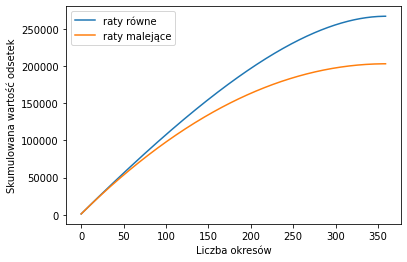

In [13]:
plt.plot(interest_equal.cumsum(),label='raty równe')
plt.plot(interest_decreasing.cumsum(),label='raty malejące')
plt.legend()
plt.xlabel('Liczba okresów')
plt.ylabel('Skumulowana wartość odsetek')

In [14]:
##Zadanie: kupujemy mieszkanie

In [15]:
#Zamierzasz kupić mieszkanie. Upatrzone M kosztuje w tym momencie 120 tys. zł, jednak przewidujesz, że przez następne 5 lat
#ceny mieszkań będą rosły w tempie 5% rocznie. W tym momencie nie dysponujesz wystarczającymi środkami, dlatego znajdujesz 
#ofertę banku, który proponuje lokatę, do której dopłacasz pewna stałą kwotę na koniec każdego miesiąca. 

#Bank oferuje nominalną stopę procentową w wysokości 12% w skali roku, przy kapitalizacji miesięcznej.

#1. Ile będzie wynosiła orientacyjna cena mieszkania za 5 lat?
#2. Ile musisz wpłacać do banku każdego miesiąca, aby przy przedstawionej ofercie uzbierać na mieszkanie w ciągu 5 lat?
#3. Stwórz wykres przedstawiający, jak w interwałach miesięcznych zmieniać się będzie cena mieszkania 
# (liniowy wzrost w całym okresie) oraz wartość twojej lokaty.



In [16]:

#    kapitalizacja odsetek i płatności z tytułu raty – 12 razy w roku, przez 5 lat
#    nominalna stopa procentowa 12,00% w skali roku
#    okres lokowania – 5 lat
#    cena mieszkania dzisiaj 120 000 zł
#    wzrost ceny mieszkania 5 % w skali roku 


In [17]:
#1. Ile będzie wynosiła orientacyjna cena mieszkania za 5 lat?

In [18]:
freq = 12
rate = 0.05
years = 5
pv = 120000

rate /= freq  # konwersja stopy do okresu miesięcznego
nper = years * freq  # liczba wszystkich okresów

In [19]:
interest_rate= 0.05/12
mortgage_amount= 120000
n_periods = 5*12
m_payment = npf.pmt(interest_rate, n_periods, mortgage_amount)
print(round(m_payment))

-2265


In [20]:
m = 2265 * 12 * 5

In [21]:
m

135900

In [22]:
# Ile musisz wpłacać do banku każdego miesiąca, aby przy przedstawionej ofercie uzbierać na mieszkanie w ciągu 5 lat?

In [23]:
npf.pmt(0.12/12, 12*5, 0, 135900, when='end')

-1664.0204403781495

In [24]:
# Stwórz wykres przedstawiający, jak w interwałach miesięcznych zmieniać się będzie cena mieszkania
#(liniowy wzrost w całym okresie) oraz wartość twojej lokaty.